In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

def load_and_plot_results(results_dir):
    # Load the results and hyperparameters
    results = np.load(os.path.join(results_dir, 'training_results.npy'))
    with open(os.path.join(results_dir, 'hyperparameters.json'), 'r') as f:
        hyperparams = json.load(f)
    
    train_sizes = hyperparams['train_sizes']
    
    # Extract initial and best test errors
    initial_test_errors = results[1, :]
    best_test_errors = results[3, :]
    
    # Create the plot
    plt.figure(figsize=(5, 3))
    
    # Plot both initial and best test errors
    plt.plot(train_sizes, initial_test_errors, 'o-', color='#FF89E7', 
             linewidth=3, markersize=2, label='Initial Test Error')
    plt.plot(train_sizes, best_test_errors, 'o-', color='#7400FF', 
             linewidth=3, markersize=2, label='Best Test Error')
    
    # Set both scales to log
    plt.xscale('log')
    plt.yscale('log')
    
    # Labels
    plt.xlabel('Training Set Size')
    plt.ylabel('Test Error')
    
    # Customize tick parameters
    plt.tick_params(axis='both', labelcolor='grey', size=0)
    
    # Add legend and title
    plt.legend()
    plt.title("Test Error vs Training Set Size")
    
    # Remove grid
    plt.grid(False)
    
    # Show plot
    plt.tight_layout()
    
    # Save the plot
    plot_path = os.path.join(results_dir, 'test_error_plot.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Plot saved to: {plot_path}")
    
    # Print the numerical results
    print("\nNumerical Results:")
    print("Train Size | Initial Test Error | Best Test Error")
    print("-" * 50)
    for size, init_err, best_err in zip(train_sizes, initial_test_errors, best_test_errors):
        print(f"{size:9d} | {init_err:16.6f} | {best_err:13.6f}")

if __name__ == "__main__":
    # Replace this with your results directory path
    results_dir = "/mnt/users/goringn/NNs_vs_Kernels/results/training_run_sgd_20241128_170704"
    load_and_plot_results(results_dir)

Plot saved to: /mnt/users/goringn/NNs_vs_Kernels/results/training_run_sgd_20241128_170704/test_error_plot.png

Numerical Results:
Train Size | Initial Test Error | Best Test Error
--------------------------------------------------
       10 |         1.019011 |      0.961526
      500 |         1.037569 |      0.818741
     1000 |         0.963651 |      0.545635
     5000 |         1.069458 |      0.173178
    10000 |         1.109804 |      0.127312
    20000 |         0.888108 |      0.023876
    50000 |         1.042379 |      0.024611
   100000 |         1.270552 |      1.270371


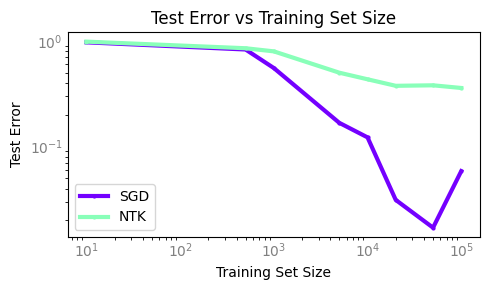


Numerical Results:
Train Size | SGD Test Error | NTK Test Error
------------------------------------------------------------
       10 |      0.966488 |      0.981279
      500 |      0.826821 |      0.849757
     1000 |      0.552256 |      0.793953
     5000 |      0.167327 |      0.498822
    10000 |      0.121965 |      0.432134
    20000 |      0.031229 |      0.374914
    50000 |      0.017061 |      0.379048
   100000 |      0.058494 |      0.357587


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
%matplotlib inline

def plot_learning_curves(sgd_dir, kernel_dir, kernel_type='nngp', save_plot=False, save_path=None):
    """
    Plot learning curves comparing SGD and kernel (NNGP/NTK) results
    
    Args:
        sgd_dir: Directory containing SGD results
        kernel_dir: Directory containing kernel results
        kernel_type: Either 'nngp' or 'ntk'
        save_plot: Whether to save the plot
        save_path: Path to save the plot (if save_plot is True)
    """
    # Load SGD results
    sgd_results = np.load(os.path.join(sgd_dir, 'training_results.npy'))
    with open(os.path.join(sgd_dir, 'hyperparameters.json'), 'r') as f:
        sgd_hyperparams = json.load(f)
    
    # Load kernel results
    kernel_train_sizes = np.load(os.path.join(kernel_dir, 'train_sizes.npy'))
    kernel_test_errors = np.load(os.path.join(kernel_dir, 'test_errors.npy'))
    
    train_sizes = sgd_hyperparams['train_sizes']
    best_test_errors = sgd_results[3, :]  # Index 3 contains best test errors
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(5, 3))
    
    # Plot SGD and kernel results
    ax.plot(train_sizes, best_test_errors, 'o-', color='#7400FF', 
            linewidth=3, markersize=2, label='SGD')
    ax.plot(kernel_train_sizes, kernel_test_errors, 'o-', color='#89FFB9', 
            linewidth=3, markersize=2, label=kernel_type.upper())
    
    # Set both scales to log
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Labels
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Test Error')
    
    # Customize tick parameters
    ax.tick_params(axis='both', labelcolor='grey', size=0)
    
    # Add legend and title
    ax.legend()
    ax.set_title("Test Error vs Training Set Size")
    
    # Remove grid
    ax.grid(False)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if requested
    if save_plot and save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")
    
    # Display plot
    plt.show()
    
    # Print the numerical results
    print("\nNumerical Results:")
    print(f"Train Size | SGD Test Error | {kernel_type.upper()} Test Error")
    print("-" * 60)
    for size, sgd_err, kernel_err in zip(train_sizes, best_test_errors, kernel_test_errors):
        print(f"{size:9d} | {sgd_err:13.6f} | {kernel_err:13.6f}")

# Example usage:
sgd_dir = "/mnt/users/goringn/NNs_vs_Kernels/results/training_run_20241128_161223"
kernel_dir = "/mnt/users/goringn/NNs_vs_Kernels/results/experiment_20241201_200531"
plot_learning_curves(sgd_dir, kernel_dir, kernel_type='ntk')

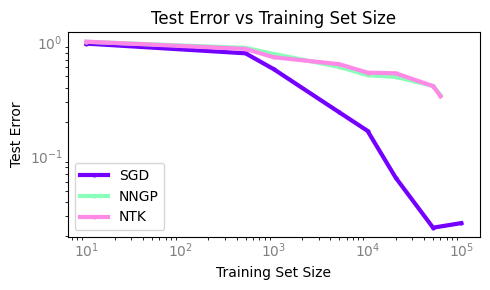


Numerical Results:
Train Size | SGD Test Error | NNGP Test Error | NTK Test Error
------------------------------------------------------------


/tmp/ipykernel_4092457/2372250116.py:50: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  nngp_idx = np.where(nngp_results['train_sizes'] == size)[0][0]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
%matplotlib inline

# Load SGD results
sgd_dir = "/mnt/users/goringn/NNs_vs_Kernels/results/training_run_sgd_20241203_022356"  # Please provide your SGD directory
sgd_results = np.load(os.path.join(sgd_dir, 'training_results.npy'))
with open(os.path.join(sgd_dir, 'hyperparameters.json'), 'r') as f:
    sgd_hyperparams = json.load(f)
train_sizes = sgd_hyperparams['train_sizes']
best_test_errors = sgd_results[3, :]  # Index 3 contains best test errors

# Load kernel results
nngp_dir = "/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/nngp_400_20241205_032426"  # Please provide your NNGP directory
ntk_dir = "/mnt/users/goringn/NNs_vs_Kernels/low_dim_poly/results/ntk_400_20241205_032855"    # Please provide your NTK directory
nngp_results = np.load(os.path.join(nngp_dir, 'prediction_results.npy'), allow_pickle=True).item()
ntk_results = np.load(os.path.join(ntk_dir, 'prediction_results.npy'), allow_pickle=True).item()

# Create plot
fig, ax = plt.subplots(figsize=(5, 3))

# Plot all curves with specified colors
ax.plot(train_sizes, best_test_errors, 'o-', color='#7400FF', 
        linewidth=3, markersize=2, label='SGD')
ax.plot(nngp_results['train_sizes'], nngp_results['results_array'][0], 'o-', 
        color='#89FFB9', linewidth=3, markersize=2, label='NNGP')
ax.plot(ntk_results['train_sizes'], ntk_results['results_array'][0], 'o-', 
        color='#FF89E7', linewidth=3, markersize=2, label='NTK')

# Set scales and labels
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('Test Error')
ax.tick_params(axis='both', labelcolor='grey', size=0)
ax.legend()
ax.set_title("Test Error vs Training Set Size")
ax.grid(False)

plt.tight_layout()
plt.show()

# Print numerical results
print("\nNumerical Results:")
print("Train Size | SGD Test Error | NNGP Test Error | NTK Test Error")
print("-" * 60)
for i, size in enumerate(train_sizes):
    nngp_idx = np.where(nngp_results['train_sizes'] == size)[0][0]
    ntk_idx = np.where(ntk_results['train_sizes'] == size)[0][0]
    print(f"{size:9d} | {best_test_errors[i]:13.6f} | "
          f"{nngp_results['results_array'][0][nngp_idx]:13.6f} | "
          f"{ntk_results['results_array'][0][ntk_idx]:13.6f}")